In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from lineticks.lineticks import LineTicks
import numpy.typing

In [3]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [280]:
class circle:
    center : np.ndarray
    radius : float

    def __init__(self, center : numpy.typing.ArrayLike, radius : float):
        self.center = np.array(center)
        self.radius = radius

    def sdf(self, p):
        v = p - self.center
        return np.linalg.norm(v, axis = -1) - self.radius
    
class box:
    def __init__(self, center  : numpy.typing.ArrayLike, bounds  : numpy.typing.ArrayLike) -> None:
        self.center = np.array(center)
        self.bounds = np.array(bounds)
    
    center : np.ndarray
    bounds : np.ndarray
    
    def sdf(self, p):
        p = p - self.center
        dist = np.abs(p) - self.bounds
        
        return np.where(np.min(dist, axis=-1) > 0, np.linalg.norm(dist, axis=-1), np.max(dist, axis = -1))

class arc:
    """_summary_
    Altered from https://www.shadertoy.com/view/wl23RK under MIT
    """
    def __init__(self, center : np.ndarray, apature : float, radius_a : float, radius_b : float) -> None:
        self.center = center
        self.sc = np.array((np.sin(apature), np.cos(apature)))
        self.radius_a = radius_a
        self.radius_b = radius_b
        
    center : np.ndarray
    sc : np.ndarray
    radius_a : float
    radius_b : float

    def sdf(self, p):
        p = p - self.center

        p[...,0] = np.abs(p[...,0]);
        return np.where(self.sc[1]*p[...,0]>self.sc[0]*p[...,1],  np.linalg.norm(p-self.sc*self.radius_a, axis=-1), np.abs(np.linalg.norm(p, axis = -1) -self.radius_a)) - self.radius_b;

In [278]:
def plotSDF(obj, ray_begin : np.ndarray, ray_end : np.ndarray, figure_width : int, sdf_resolution : complex, ray_resolution : int):
    ray_begin = np.array(ray_begin)
    ray_end = np.array(ray_end)
    ray_length = np.linalg.norm(ray_begin - ray_end)
    ray_dir = (ray_end - ray_begin) / ray_length
    
    ray_coords = np.linspace(ray_begin, ray_end, ray_resolution)
    # print(ray_coords.shape)
    ray_marker_count = int(ray_length)
    ray_markers = np.linspace(ray_begin, ray_begin + ray_dir * ray_marker_count, ray_marker_count)
    
    X, Y = np.mgrid[-figure_width:figure_width:sdf_resolution, -figure_width:figure_width:sdf_resolution]
    fig = plt.figure(figsize=(7, 9))
    
    # Create a mask
    mask = obj.sdf(np.array((X,Y)).T) <= 0
    
    ax = fig.add_subplot()
    
    ax.set_title('SDF with ray')
    
    line = ax.plot(ray_coords[:,0], ray_coords[:,1])[0]
    
    ax.plot(ray_markers[:,0], ray_markers[:,1], marker='o', linestyle='None')[0]
    for i, (x, y) in zip(range(ray_marker_count), np.nditer([ray_markers[:,0], ray_markers[:,1]])):
        ax.annotate(i, (x,y), textcoords="offset points",xytext=(0,7),ha="center")

    #print(ray_markers)
    
    #LineTicks(line, range(0, ray_marker_count), 10, lw=2)
    add_arrow(line, direction='right')
    ax.imshow(~mask, extent=(-figure_width, figure_width, -figure_width, figure_width), alpha=0.5, cmap='gray', aspect='auto', origin='lower')
    ax.set_aspect('equal')
    ax.set_xlim(-5.5, 7.5)
    ax.set_ylim(-5.5, 6.5)

    plt.tight_layout()
    plt.show()
    
    # print(ray_coords)
    # print(list(zip(ray_coords, obj.sdf(ray_coords))))
    plt.plot(obj.sdf(ray_coords))
    plt.xlim(0, ray_resolution)
    plt.xticks(np.arange(ray_marker_count) * float(ray_resolution) / ray_marker_count, np.arange(ray_marker_count))
    plt.grid(axis = 'x')

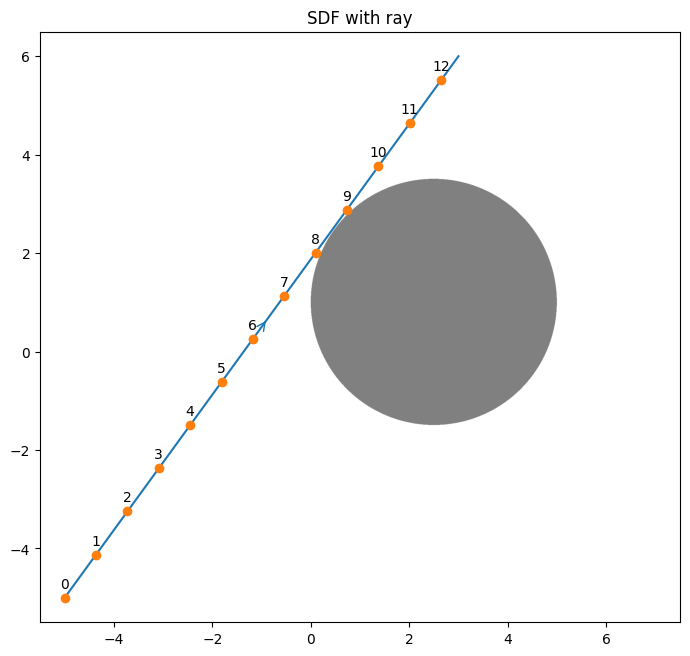

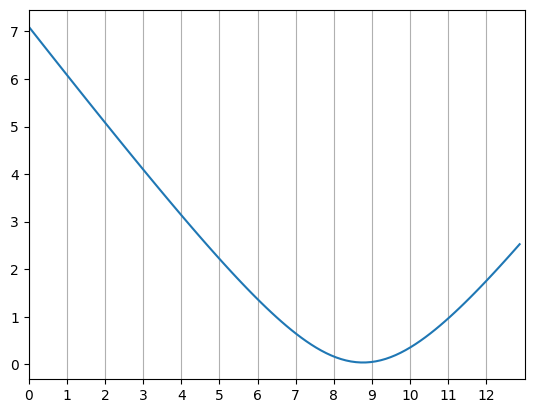

In [265]:
obj = circle((2.5,1), 2.5)


ray_begin = (-5,-5)
ray_end =  (3,6)


figure_width = 10
sdf_resolution = 3000j
ray_resolution = 100


plotSDF(obj, ray_begin, ray_end, figure_width, sdf_resolution, ray_resolution)

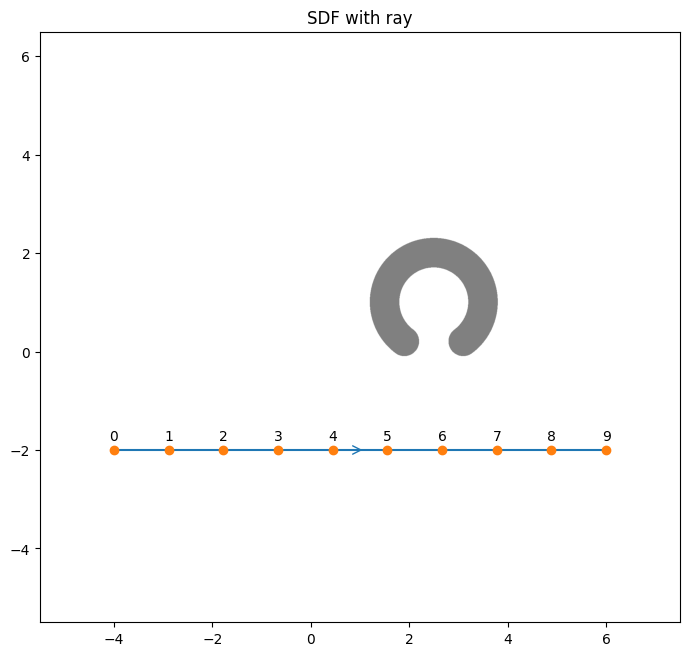

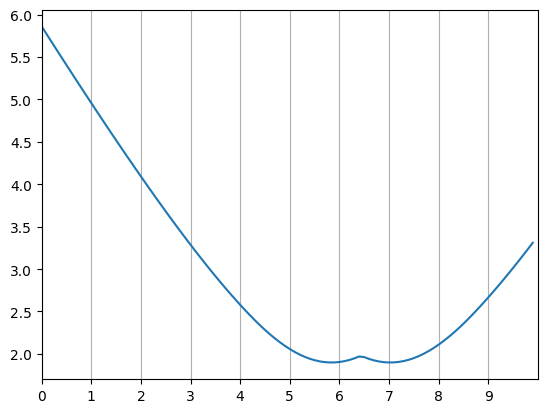

In [284]:
obj = arc((2.5,1), 2.5, 1, 0.3)


ray_begin = (-4,-2)
ray_end =  (6, -2)


figure_width = 10
sdf_resolution = 3000j
ray_resolution = 100


plotSDF(obj, ray_begin, ray_end, figure_width, sdf_resolution, ray_resolution)

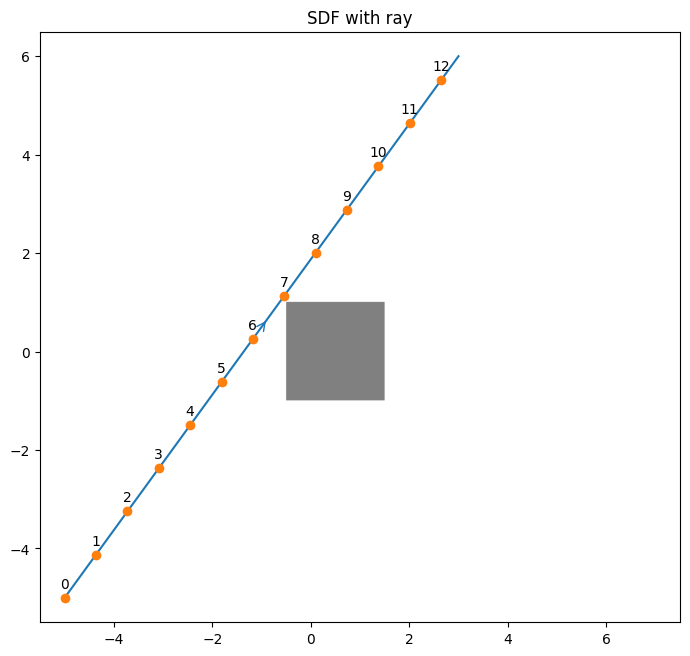

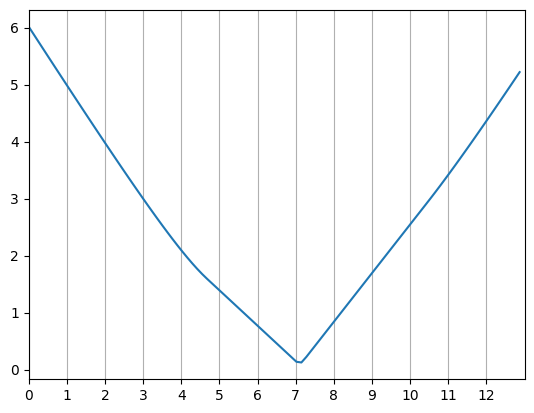

In [272]:
obj = box((0.5,0), (1,1))

ray_begin = np.array((-5,-5))
ray_end =  np.array((3,6))


figure_width = 10
sdf_resolution = 3000j
ray_resolution = 100


plotSDF(obj, ray_begin, ray_end, figure_width, sdf_resolution, ray_resolution)